# Import Library

In [2]:
import pathlib
import IPython.display as display
import scipy.io as sio 
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
import random
import os

## Setting

In [3]:
IN = "dataset/depthMat/"
OUT= "dataset/depth/"
width,height = (1704,2272)

## Load ALL 

In [4]:
root = pathlib.Path(IN)
all_image_paths = list(root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths]
print("Loaded " +str(len(all_image_paths))+" Images.\n "+str(all_image_paths[:3])+"\n...")


Loaded 400 Images.
 ['dataset\\depthMat\\depth_sph_corr-060705-17.10.14-p-018t000.mat', 'dataset\\depthMat\\depth_sph_corr-060705-17.10.14-p-111t000.mat', 'dataset\\depthMat\\depth_sph_corr-060705-17.10.14-p-142t000.mat']
...


In [171]:
def MatDepth2Gray(path):
    mat = sio.loadmat(path, appendmat=True)
    img = mat['Position3DGrid'][:,:,:]
    img = cv2.normalize(img,None,alpha=0, beta=1, norm_type=cv2.NORM_MINMAX , dtype=cv2.CV_64F).astype(np.float32)
    img = cv2.cvtColor(img ,  cv2.COLORMAP_JET )
   # img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    #img = cv2.cvtColor(img ,  cv2.COLOR_RGB2GRAY )
    img = cv2.resize(img, (width,height),interpolation = cv2.INTER_AREA)
    return (img * 255).astype(np.uint8)

## Random Sample 4 Images

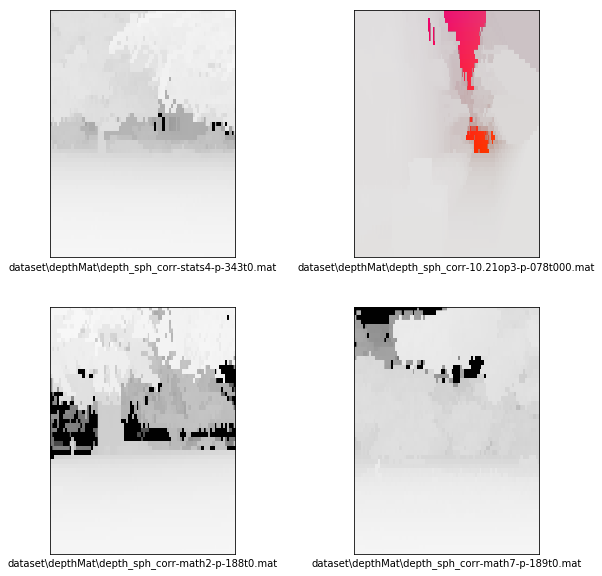

In [174]:
plt.figure(figsize=(10,10))
for n in range(4):
    image_path = random.choice(all_image_paths)
    img = MatDepth2Gray(image_path)

    plt.subplot(2,2,n+1)
    plt.imshow(img)
     
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(image_path)

## Batch Convert

In [175]:
for n,image in enumerate(all_image_paths):
    filename = os.path.splitext(os.path.basename(image))[0]
    #print(filename)
    im = MatDepth2Gray(image)
    plt.imsave(OUT+filename+".png", im,format="png")

KeyboardInterrupt: 